<a href="https://colab.research.google.com/github/Dhairyakumarshah/Plant-disease/blob/main/final_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Define the path to the ZIP file in Google Drive
zip_path = '/content/drive/MyDrive/Research Data/12 different.zip'

#Import necessary libraries
import zipfile
from collections import defaultdict

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List the ZIP archive
    file_list = zip_ref.namelist()

    # dictionary to count images per label
    label_count = defaultdict(int)

    # Loop through each file in the archive
    for file in file_list:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
            # Extract label from folder structure (assuming it's in the second level)
            label = file.split('/')[-3]  # Adjust based on folder structure
            label_count[label] += 1

    # Total images
    total_images = sum(label_count.values())

    # needed information
    print("Total number of images:", total_images)
    print("Number of unique labels:", len(label_count))
    print("\nImage count per label:")
    for label, count in label_count.items():
        print(f"{label}: {count} images")

Total number of images: 4502
Number of unique labels: 12

Image count per label:
Alstonia Scholaris (P2): 433 images
Arjun (P1): 452 images
Bael (P4): 118 images
Basil (P8): 148 images
Chinar (P11): 223 images
Gauva (P3): 419 images
Jamun (P5): 624 images
Jatropha (P6): 257 images
Lemon (P10): 236 images
Mango (P0): 435 images
Pomegranate (P9): 559 images
Pongamia Pinnata (P7): 598 images


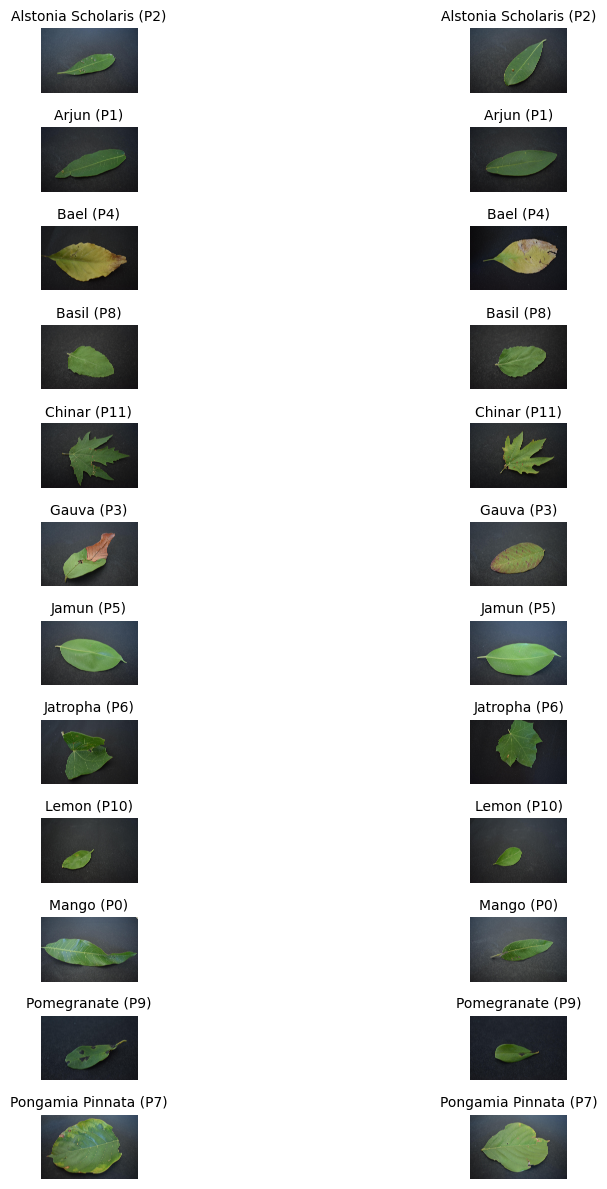

In [12]:
#Import necessary libraries
import zipfile
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from collections import defaultdict

# Display only two images from each label
def display_two_images_per_label(zip_path):
    # Open the ZIP file and read images with labels
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # List all image files in the ZIP archive
        image_files = [file for file in zip_ref.namelist() if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Dictionary to hold two images per label
        label_images = defaultdict(list)

        # Collect two images per label
        for image_path in image_files:
            label = image_path.split('/')[-3]  # Extract label from folder structure

            # Store up to two images per label
            if len(label_images[label]) < 2:
                label_images[label].append(image_path)

        # Display the images
        plt.figure(figsize=(12, 12))
        img_index = 1

        for label, images in label_images.items():
            for image_path in images:
                with zip_ref.open(image_path) as img_file:
                    img = Image.open(BytesIO(img_file.read()))

                    # Plot image with label as title
                    plt.subplot(len(label_images), 2, img_index)
                    plt.imshow(img)
                    plt.title(label, fontsize=10)
                    plt.axis('off')
                    img_index += 1

        plt.tight_layout()
        plt.show()

# Call the function to display two images per label
display_two_images_per_label(zip_path)